In [ ]:
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 5.2 MB/s 
     |████████████████████████████████| 60.9 MB 1.2 MB/s 
     |████████████████████████████████| 128 kB 50.7 MB/s 
     |████████████████████████████████| 87 kB 635 kB/s 
     |████████████████████████████████| 10.9 MB 26.8 MB/s 
     |████████████████████████████████| 3.4 MB 37.2 MB/s 
     |████████████████████████████████| 840 kB 6.5 MB/s 
     |████████████████████████████████| 238 kB 49.2 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 1.1 MB 23.5 MB/s 
     |████████████████████████████████| 1.3 MB 37.9 MB/s 
     |████████████████████████████████| 25.3 MB 54.3 MB/s 
     |████████████████████████████████| 497.9 MB 30 kB/s 
     |████████████████████████████████| 352 kB 64.9 MB/s 
     |████████████████████████████████| 462 kB 54.0 MB/s 
     |█████████████████████████████

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
import os
 
import seaborn as sn
from sklearn.metrics import confusion_matrix
 
import tensorflow as tf
assert tf.__version__.startswith('2')
 
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

In [ ]:
!gdown --id 1AS3t2BlTN8_qfbfqUi0cEIzFg_PYGaLJ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1AS3t2BlTN8_qfbfqUi0cEIzFg_PYGaLJ
To: /content/vegetables.zip
100% 79.5M/79.5M [00:00<00:00, 155MB/s]


In [ ]:
ds_path = "Rere"

In [ ]:
import os, zipfile
 
 
zip_archive = "vegetables.zip"
zip_ref = zipfile.ZipFile(zip_archive, "r")
zip_ref.extractall(ds_path)
zip_ref.close()

In [ ]:
datasets = DataLoader.from_folder(ds_path)

In [ ]:
training, rest = datasets.split(0.8) # 80% for training
validation, testing = rest.split(0.5) # 10% for testing, 10% for validation

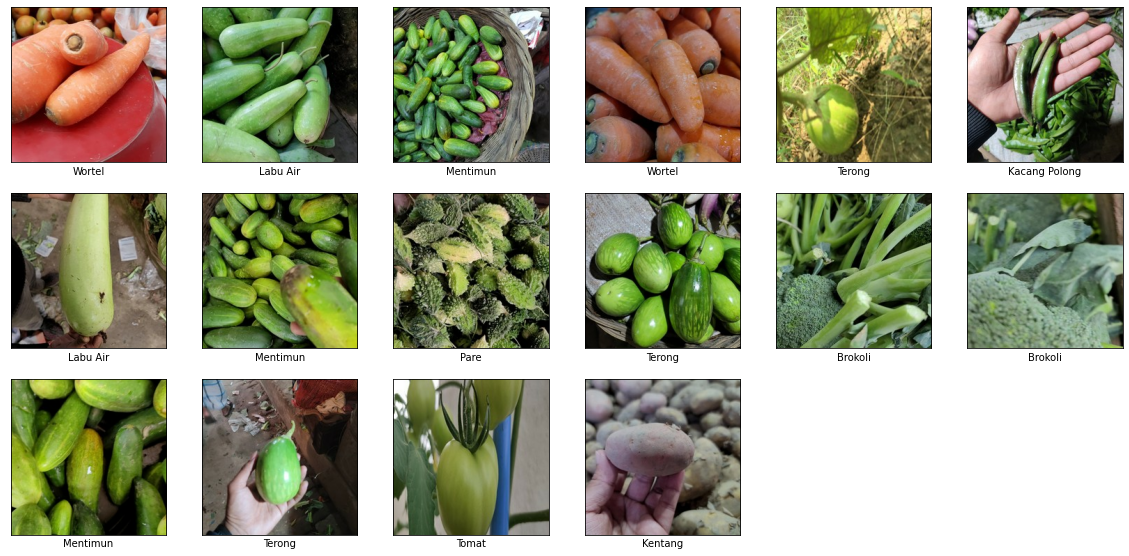

In [ ]:
plt.figure(figsize=(20, 20))
for i, (image, label) in enumerate(
    datasets.gen_dataset().unbatch().take(16)):
  plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(datasets.index_to_label[label.numpy()])
 
plt.show()

In [ ]:
efficientnet_model = model_spec.get("efficientnet_lite1")

In [ ]:
model = image_classifier.create(training,
                                epochs=20,
                                validation_data=validation,
                                use_augmentation=True,
                                shuffle=True,
                                model_spec=efficientnet_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             4189344   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 4,208,559
Trainable params: 19,215
Non-trainable params: 4,189,344
_________________________________________________________________
None
Epoch 1/20
75/75 [==============================] - 183s 2s/step - loss: 1.5481 - accuracy: 0.6950 - val_loss: 0.8386 - val_accuracy: 0.9600
Epoch 2/20
75/75 [==============================] - 181s 2s/step - loss: 0.8777 - accuracy: 0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             4189344   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 15)                19215     
                                                                 
Total params: 4,208,559
Trainable params: 19,215
Non-trainable params: 4,189,344
_________________________________________________________________


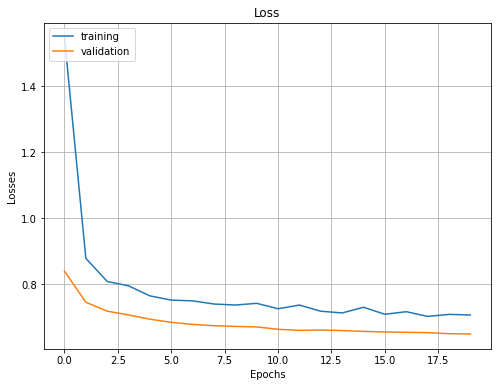

In [ ]:
%matplotlib inline
 
#Loss graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Loss")
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

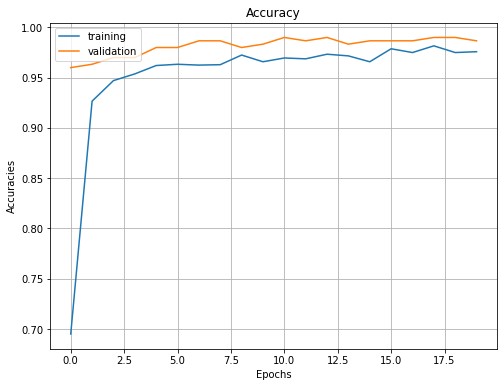

In [ ]:
#Accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("Accuracies")
plt.xlabel("Epochs")
plt.grid(True)
plt.legend(["training", "validation"], loc="upper left")
plt.show()

In [ ]:
model.evaluate(testing)

10/10 [==============================] - 23s 2s/step - loss: 0.6358 - accuracy: 0.9967


[0.6357513666152954, 0.996666669845581]

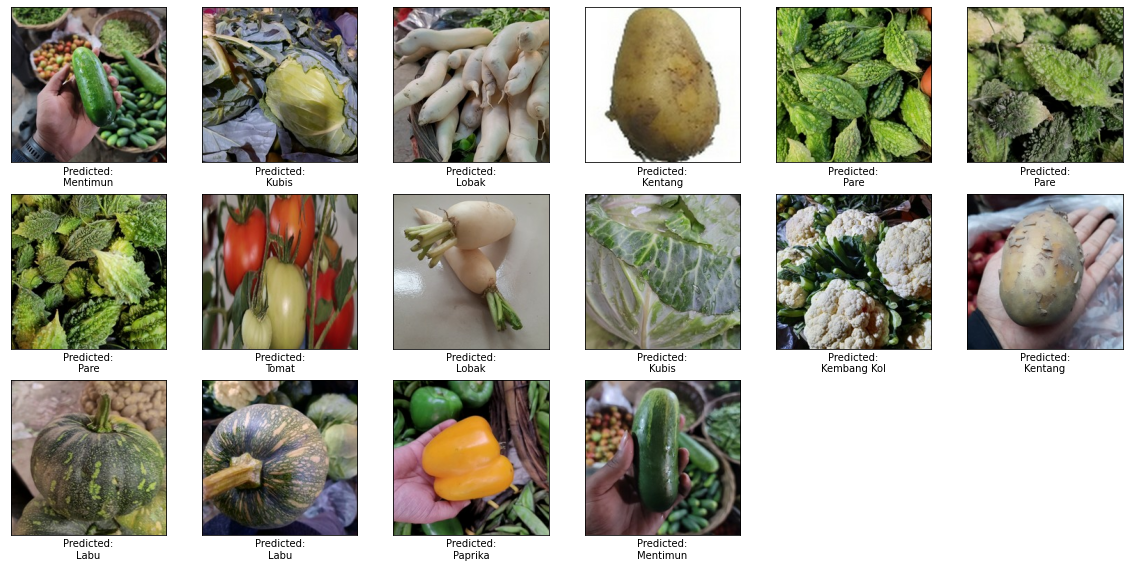

In [ ]:
def get_label_color(predict_label, actual_label):
  if predict_label == actual_label:
    return "black"
  else:
    return "red"
 
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(testing)
for i, (image, label) in enumerate(
    testing.gen_dataset().unbatch().take(16)):
  ax = plt.subplot(6, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap="Greys")
 
  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          testing.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel("Predicted:\n{}".format(predict_label))
 
plt.show()

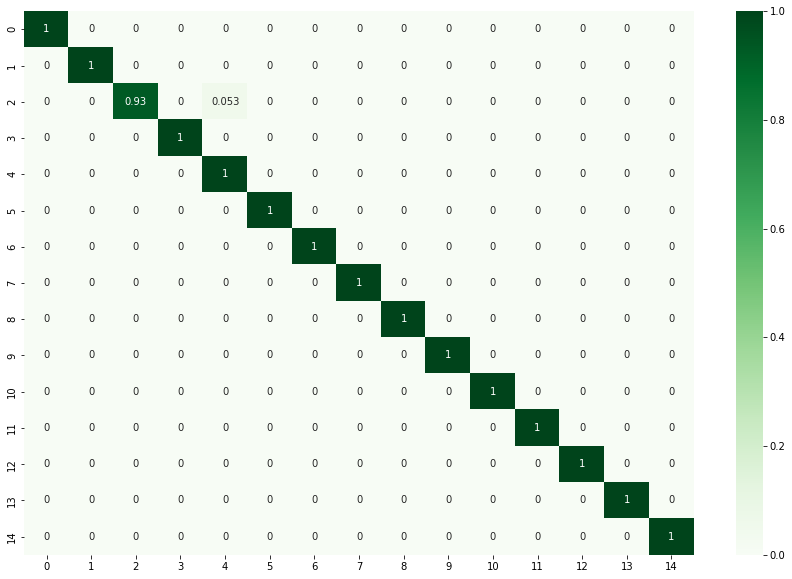

In [ ]:
labels = os.listdir(os.path.join(ds_path))
labels.sort()
 
label_dicts = {}
 
for i in range(len(labels)):
  label_dicts[labels[i]] = i
 
predicts = model.predict_top_k(testing)
predict_labels = [ label_dicts[predicts[i][0][0]]
                  for i, (image, label) in enumerate(testing.gen_dataset().unbatch()) ]
 
actual_labels = [ label.numpy()
                  for i, (image, label) in enumerate(testing.gen_dataset().unbatch()) ]
 
plt.figure(figsize=(15, 10))
signhand_cm = confusion_matrix(y_true=actual_labels, y_pred=predict_labels)
signhand_cm = signhand_cm / signhand_cm.sum(axis=1) # To display conf. matrix in percetage %
 
sn.heatmap(signhand_cm, annot=True, cmap="Greens")

In [ ]:
model.export(export_dir=".")

/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
model.export(export_dir=".", export_format=ExportFormat.LABEL)

In [ ]:
model.evaluate_tflite("model.tflite", testing)

{'accuracy': 0.9966666666666667}

In [ ]:
quantizer = QuantizationConfig.for_int8(representative_data=testing)

model.export(export_dir=".", quantization_config=quantizer)

/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
model.evaluate_tflite("model.tflite", testing)

{'accuracy': 0.9966666666666667}

In [ ]:
from google.colab import files
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>